In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0bd65557fd150a74c3db77f3b5a9b084


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [18]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 26 of Set 25 | albany
Processing Record 27 of Set 25 | qaanaaq
Processing Record 28 of Set 25 | chokurdakh
Processing Record 29 of Set 25 | hobart
Processing Record 30 of Set 25 | saskylakh
Processing Record 31 of Set 25 | atuona
Processing Record 32 of Set 25 | terney
Processing Record 33 of Set 25 | kamaishi
Processing Record 34 of Set 25 | kaupanger
Processing Record 35 of Set 25 | port alfred
Processing Record 36 of Set 25 | malindi
Processing Record 37 of Set 25 | bonavista
Processing Record 38 of Set 25 | pafos
Processing Record 39 of Set 25 | longlac
City not found. Skipping...
Processing Record 40 of Set 25 | ribeira grande
Processing Record 41 of Set 25 | meiktila
Processing Record 42 of Set 25 | zolotinka
City not found. Skipping...
Processing Record 43 of Set 25 | rawson
Processing Record 44 of Set 25 | avera
Processing Record 45 of Set 25 | cruden bay
City not found. Skipping...
Processing Record 46 of Set 25 | barentsburg
City not found. Skipping...
Proce

Processing Record 32 of Set 28 | pringsewu
Processing Record 33 of Set 28 | lerwick
Processing Record 34 of Set 28 | constitucion
Processing Record 35 of Set 28 | katsuura
Processing Record 36 of Set 28 | mehamn
Processing Record 37 of Set 28 | orlik
Processing Record 38 of Set 28 | jinji
Processing Record 39 of Set 28 | pietarsaari
Processing Record 40 of Set 28 | wajima
Processing Record 41 of Set 28 | tasbuget
City not found. Skipping...
Processing Record 42 of Set 28 | cabo san lucas
Processing Record 43 of Set 28 | pitimbu
Processing Record 44 of Set 28 | deputatskiy
Processing Record 45 of Set 28 | cajamarca
Processing Record 46 of Set 28 | lalian
Processing Record 47 of Set 28 | lobito
Processing Record 48 of Set 28 | promissao
Processing Record 49 of Set 28 | lufilufi
Processing Record 50 of Set 28 | torbay
Processing Record 1 of Set 29 | luanda
Processing Record 2 of Set 29 | kiruna
Processing Record 3 of Set 29 | santiago
Processing Record 4 of Set 29 | tazovskiy
Processing R

Processing Record 17 of Set 32 | puerto escondido
Processing Record 18 of Set 32 | rocha
Processing Record 19 of Set 32 | beringovskiy
Processing Record 20 of Set 32 | tateyama
Processing Record 21 of Set 32 | gamboma
Processing Record 22 of Set 32 | sobolevo
Processing Record 23 of Set 32 | akyab
Processing Record 24 of Set 32 | maniwaki
Processing Record 25 of Set 32 | sarangani
Processing Record 26 of Set 32 | odienne
Processing Record 27 of Set 32 | maniitsoq
Processing Record 28 of Set 32 | sao felix do xingu
Processing Record 29 of Set 32 | brattvag
Processing Record 30 of Set 32 | gat
Processing Record 31 of Set 32 | sofiysk
City not found. Skipping...
Processing Record 32 of Set 32 | berbera
Processing Record 33 of Set 32 | samarai
Processing Record 34 of Set 32 | tabuk
Processing Record 35 of Set 32 | touros
Processing Record 36 of Set 32 | khawhai
Processing Record 37 of Set 32 | jinxi
Processing Record 38 of Set 32 | nome
Processing Record 39 of Set 32 | portland
Processing 

Processing Record 3 of Set 36 | kalachinsk
Processing Record 4 of Set 36 | iskateley
Processing Record 5 of Set 36 | tigil
Processing Record 6 of Set 36 | mantua
Processing Record 7 of Set 36 | lima
Processing Record 8 of Set 36 | port macquarie
Processing Record 9 of Set 36 | meulaboh
Processing Record 10 of Set 36 | faanui
Processing Record 11 of Set 36 | broome
Processing Record 12 of Set 36 | dustlik
Processing Record 13 of Set 36 | belyy yar
Processing Record 14 of Set 36 | kakamega
Processing Record 15 of Set 36 | algiers
Processing Record 16 of Set 36 | kurchum
Processing Record 17 of Set 36 | pervomayskoye
Processing Record 18 of Set 36 | sao jose da coroa grande
Processing Record 19 of Set 36 | chingola
Processing Record 20 of Set 36 | hay river
Processing Record 21 of Set 36 | malanje
Processing Record 22 of Set 36 | pierre
Processing Record 23 of Set 36 | zeya
Processing Record 24 of Set 36 | ruswil
Processing Record 25 of Set 36 | ilulissat
Processing Record 26 of Set 36 | 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,19.00,52,72,1.01,US,2021-03-02 05:10:04
1,Qaanaaq,77.4840,-69.3632,-18.53,71,13,4.09,GL,2021-03-02 05:10:04
2,Chokurdakh,70.6333,147.9167,-26.07,84,25,5.82,RU,2021-03-02 05:10:04
3,Hobart,-42.8794,147.3294,57.20,54,75,17.27,AU,2021-03-02 05:10:05
4,Saskylakh,71.9167,114.0833,-35.01,81,86,1.95,RU,2021-03-02 05:10:05
5,Atuona,-9.8000,-139.0333,79.68,75,4,13.91,PF,2021-03-02 05:10:06
6,Terney,45.0503,136.6092,20.61,56,43,9.24,RU,2021-03-02 05:10:06
7,Kamaishi,39.2667,141.8833,48.20,100,75,3.44,JP,2021-03-02 05:10:06
8,Kaupanger,61.1845,7.2404,39.99,93,40,8.05,NO,2021-03-02 05:10:06
9,Port Alfred,-33.5906,26.8910,66.99,93,85,6.62,ZA,2021-03-02 05:10:06


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-03-02 05:10:04,42.6001,-73.9662,19.00,52,72,1.01
1,Qaanaaq,GL,2021-03-02 05:10:04,77.4840,-69.3632,-18.53,71,13,4.09
2,Chokurdakh,RU,2021-03-02 05:10:04,70.6333,147.9167,-26.07,84,25,5.82
3,Hobart,AU,2021-03-02 05:10:05,-42.8794,147.3294,57.20,54,75,17.27
4,Saskylakh,RU,2021-03-02 05:10:05,71.9167,114.0833,-35.01,81,86,1.95
5,Atuona,PF,2021-03-02 05:10:06,-9.8000,-139.0333,79.68,75,4,13.91
6,Terney,RU,2021-03-02 05:10:06,45.0503,136.6092,20.61,56,43,9.24
7,Kamaishi,JP,2021-03-02 05:10:06,39.2667,141.8833,48.20,100,75,3.44
8,Kaupanger,NO,2021-03-02 05:10:06,61.1845,7.2404,39.99,93,40,8.05
9,Port Alfred,ZA,2021-03-02 05:10:06,-33.5906,26.8910,66.99,93,85,6.62


In [27]:
# Create the output file (CSV).
#output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1614824780.750554

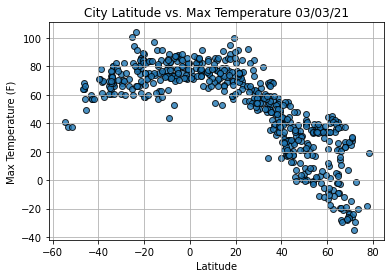

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

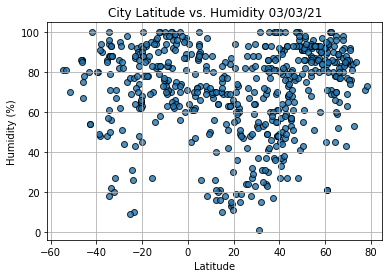

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

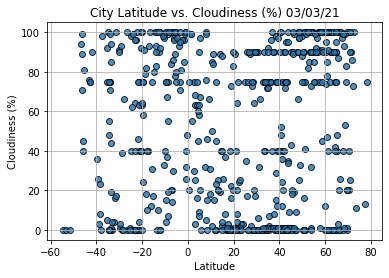

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


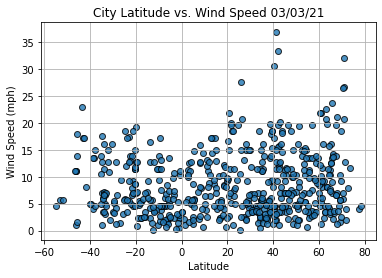

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()